In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
sns.set()

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_index = raw_csv_data.copy()

Length of time Period

In [3]:
df_index.date.describe()

count           6269
unique          6269
top       25/10/2007
freq               1
Name: date, dtype: object

Converting Text date to Datetime

In [4]:
df_index.date = pd.to_datetime(df_index.date, dayfirst = True)
df_index

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df_index.date.describe()

/home/amun/.local/share/virtualenvs/minor_project_3-Z1UCW5Hn/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

Setting the index

In [6]:
df_index.set_index("date", inplace=True)
df_index

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [7]:
df_index.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

Setting the desired Frequency

In [8]:
df_index = df_index.asfreq('d')
df_index

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [9]:
#To take only business days and leave out holidays
df_index = df_index.asfreq('b')
df_index

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


Handling Missing Values

In [10]:
df_index.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [11]:
#Front Fill
df_index.spx = df_index.spx.fillna(method="ffill")
df_index.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [12]:
#Back Fill
df_index.ftse = df_index.ftse.fillna(method="bfill")
df_index.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [13]:
#Average Fill
df_index.dax = df_index.dax.fillna(value=df_index.dax.mean())
df_index.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [14]:
df_index.nikkei = df_index.nikkei.fillna(value=df_index.nikkei.mean())
df_index.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Simplyfing the Dataset

In [15]:
# Lets Analyze only how spx performs
df_index['market_value'] = df_index.spx

In [16]:
df_index

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,469.900000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,475.270000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,474.130000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,474.170000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,2839.130362
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2839.253031


In [17]:
del df_index['spx']
del df_index['dax']
del df_index['ftse']
del df_index['nikkei']

In [18]:
df_index.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Splitting the Data

In [19]:
size = int(len(df_index)*0.8)
size

5021

In [20]:
df = df_index.iloc[:size]
df_test = df_index.iloc[size:]

In [21]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [22]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


White Noise

Random Walk

In [25]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [26]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [27]:
df['rw'] = rw.price

/home/amun/.local/share/virtualenvs/minor_project_3-Z1UCW5Hn/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.head()

,market_value,rw
date,,
1994-01-07,469.90,1122.139662
1994-01-10,475.27,1080.347860
1994-01-11,474.13,1082.095245
1994-01-12,474.17,1083.639265
1994-01-13,472.47,1067.146255


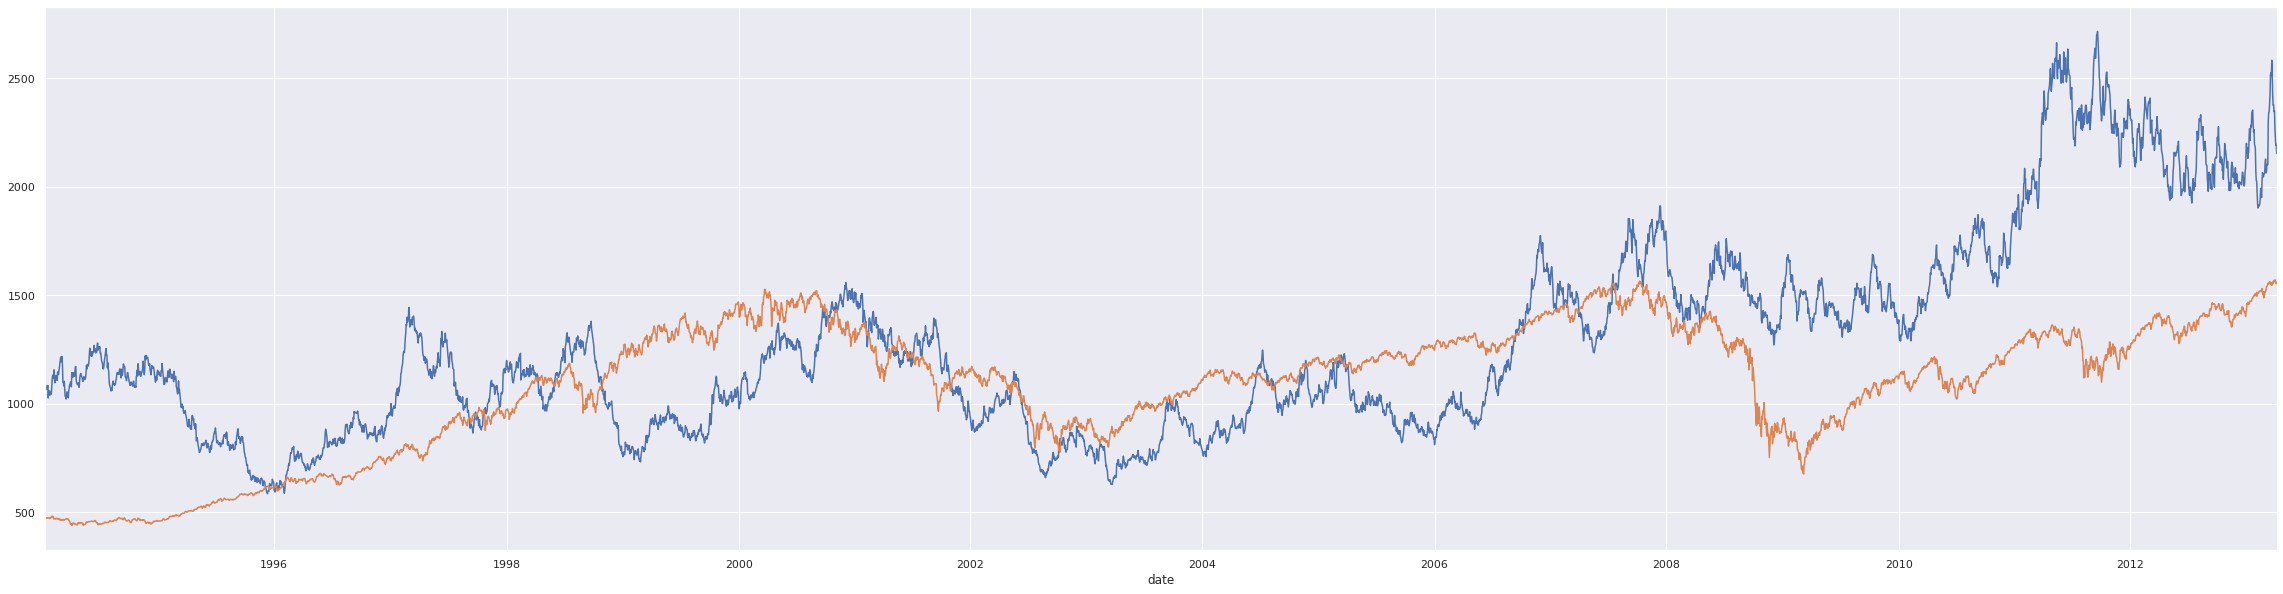

In [32]:
df.rw.plot(figsize=(40,10))
df.market_value.plot()
plt.show()

 Stationarity

In [36]:
#Stationarity test by David Dickey and Wanye Fuller
sts.adfuller(df.market_value)

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

Seasonality
There are various ways to test seasonility, One of the ways is to decompose the sequence, where we split the time effext to 3 components:
1.Trend 2.Seasonal 3.Residuals 
We here use naive decomposion

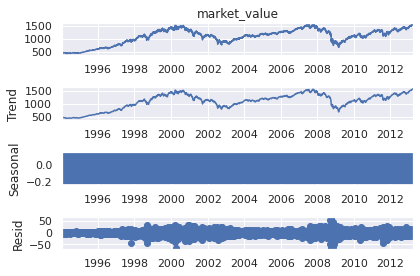

In [40]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

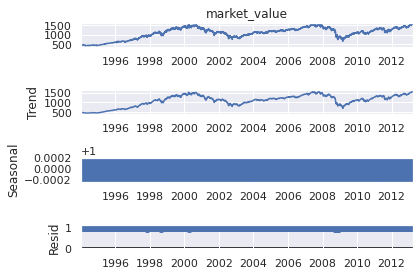

In [42]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

ACF

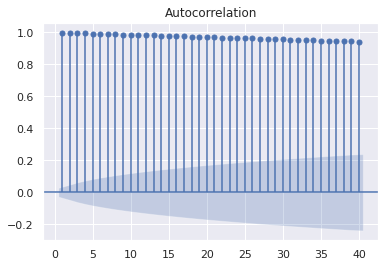

In [45]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.show()

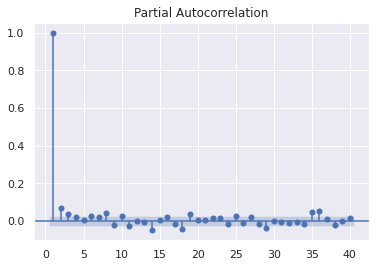

In [49]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, alpha=0.05, method=('ols'))
plt.show()

The AR(1)
- AR model relies on past period values and past periods only to predict current period values
- A linear model
- current period value(xt) = Constant(C) + Numeric Coeff*Past period value(x(t-1)) + Resudials 

In [52]:
model_ar = ARMA(df.market_value, order=(1,0))

/home/amun/.local/share/virtualenvs/minor_project_3-Z1UCW5Hn/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [53]:
results_ar = model_ar.fit()

In [55]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Sun, 15 Aug 2021   AIC                          40200.776
Time:                        08:09:07   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1059.0819    228.488      4.635      0.000     611.254    1506.910
ar.L1.market_value     0.9994      0.001   1911.371      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""